In [2]:
import os
import pandas as pd # pip3 install pandas
import matplotlib.pyplot as plt # pip3 install matplotlib
from functools import reduce
plt.rcParams['figure.figsize'] = [10, 6]
plt.rcParams['figure.dpi'] = 100 # 200 e.g. is really fine, but slower

In [3]:
root_path = os.path.realpath('.')
data_folder = os.path.abspath(os.path.join(root_path, "..", 'data'))
data_files = os.listdir(data_folder)

In [4]:
experiment = 'road_tire_friction'
# experiment = 'tire_stiffness'
# experiment = 'coaster_test'

experiment_files = [os.path.join(data_folder,file) for file in data_files if experiment in file]
dfs = []
if len(experiment_files) > 0:
    
    dfs = [{"timestamp":filename.split("_")[-1].split(".")[0],"df":pd.read_csv(filename)} for filename in experiment_files]
    dfs.sort(key=lambda elem: elem['timestamp'])
    
    print("The following experiments were found:")
    for _df in dfs:
        df = _df['df']
        timestamp = _df["timestamp"]
        print("   ->   " + timestamp)
#         df["time[ms]"] = df["time[ms]"] - df["time[ms]"][0]
        df.set_index("time[ms]", inplace=True)
        df.index = df.index - df.index[0]
        
else: 
    print("No experiments found!")

The following experiments were found:
   ->   20210706-182807
   ->   20210706-183132
   ->   20210706-183406
   ->   20210706-183646
   ->   20210706-183729


In [5]:
# a = []
# for i,_df in enumerate(dfs):
#     if(i==0):
#         a = _df["df"]["force[N]"]
#     else:
#         a += _df["df"]["force[N]"]
# a.dropna()
# avg_force = reduce(lambda a,b: a["df"]["force[N]"]+b["df"]["force[N]"],dfs) / len(dfs)


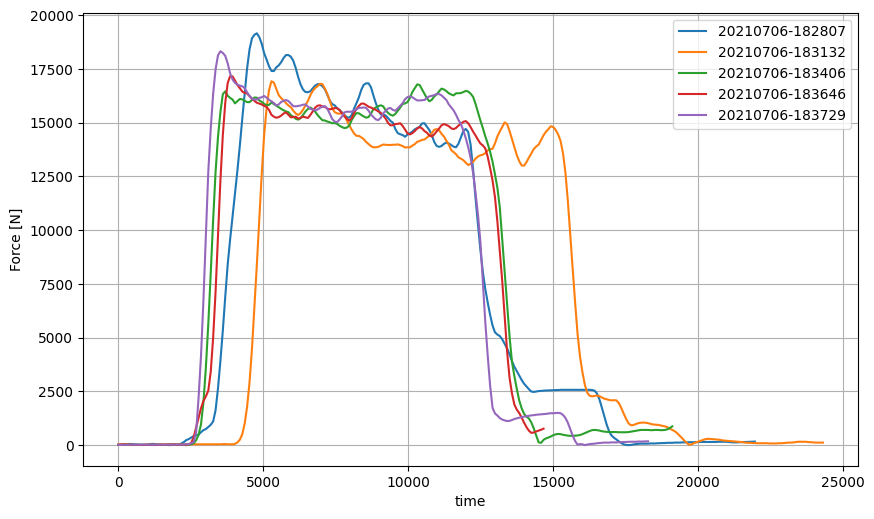

In [8]:
for _df in dfs:
    df = _df["df"]
    timestamp = _df["timestamp"]
    plt.plot(df["force[N]"].abs(), label=timestamp)
    plt.legend()
plt.xlabel("time")
plt.ylabel("Force [N]")
plt.grid()